In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.ndim

3

In [4]:
train_images.shape

(60000, 28, 28)

In [7]:
# unit8은 8개의 비트로 256개의 서로 다른 값을 표현
# 이미지 처리에 있어서 많이 사용되는 데이터 형식중 하나이며 메모리 관리가 효율적이고 연산에도 효과적

train_images.dtype

dtype('uint8')

In [8]:
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### 다섯번째 이미지 출력

### 이미지 데이터
- 3차원 이미지의 차원은 "가로 픽셀 수 x 세로 픽셀 수 x 이미지 슬라이스 수"로 표현
- 픽셀은 이미지를 구성하는 가장 작은 단위로, "picture element"의 줄임말이며 이미지를 표현하는 데 사용되는 점 또는 화소
- 흑백 이미지의 경우, 각 픽셀은 단일 색상 값을 가지며, 일반적으로 0부터 255까지의 범위로 표현. 0은 픽셀이 검은색에 가깝고, 255는 픽셀이 흰색에 가깝다.
- 컬러 이미지의 경우, 각 픽셀은 일반적으로 RGB(Red, Green, Blue) 값을 가지며 각각 빨강, 초록, 파랑의 강도를 나타내며, 0부터 255까지의 범위로 표현
- 강도의 조합에 따라 다양한 색상이 생성. 예를 들어, (255, 0, 0)은 빨간색, (0, 255, 0)은 초록색, (0, 0, 255)는 파란색
- 각 픽셀은 이미지의 위치에 따라 좌표로 식별. 가장 왼쪽 위 픽셀이 (0, 0)이며, 가로 방향으로 증가하면서 픽셀의 열 인덱스가 증가하고, 세로 방향으로 증가하면서 픽셀의 행 인덱스가 증가
- 이미지 처리 작업에서는 픽셀 단위의 조작이 중요하며, 픽셀 값을 수정하거나 분석하여 다양한 이미지 효과를 생성하거나 이미지에서 정보를 추출

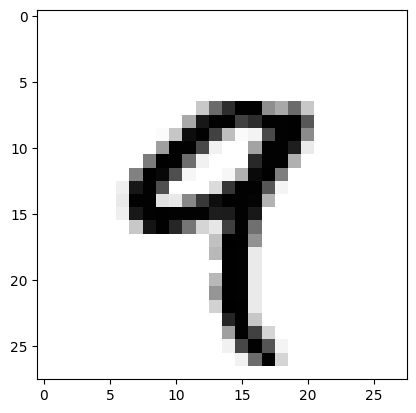

In [10]:
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap = plt.cm.binary)

plt.show()

In [11]:
my_slice = train_images[10 : 100]
my_slice.shape

(90, 28, 28)

In [16]:
my_slice = train_images[10 : 100, :, :]
my_slice.shape

(90, 28, 28)

In [18]:
my_slice = train_images[10 : 100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [24]:
my_slice = train_images[:, 14 :, 14 :]
my_slice.shape

(60000, 14, 14)

In [25]:
my_slice = train_images[:, 7 : -7, 7 : -7]
my_slice.shape

(60000, 14, 14)

### 배치데이터

In [23]:
batch = train_images[: 128]

In [26]:
batch = train_images[128 : 256]

In [28]:
n = 3
batch = train_images[128 * n : 128 * (n + 1)]

### 텐서연산

In [30]:
def naive_relu(x) :
  assert len(x.shape) == 2
  x = x.copy()

  for i in range(x.shape[0]) :

    for j in range(x.shape[1]) :

      x[i , j] = max(x[i, j], 0)

  return x

In [31]:
def naive_add(x, y) :
  assert x.shape == y.shape

  x = x.copy()

  for i in range(x.shape[0]) :

    for j in range(x.shape[1]) :

      x[i, j] += y[i, j]

  return x

In [37]:
import numpy as np
import time

z = x + y
z = np.maximum(z, 0.)

In [39]:
x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0  = time.time()
for _ in range(1000) :
  z = x + y
  z = np.maximum(z, 0.)

print('걸린시간 : {0: .2f} s'.format(time.time() - t0))

걸린시간 :  0.02 s


In [41]:
t0  = time.time()

for _ in range(1000) :

  z = naive_add(x, y)
  z = naive_relu(z)

print('걸린시간 : {0: .2f} s'.format(time.time() - t0))

걸린시간 :  3.08 s


### 브로드캐스팅

In [42]:
x = np.random.random((32, 10))
y = np.random.random((10,))


In [43]:
y = np.expand_dims(y, axis = 0)

In [44]:
y

array([[0.29054193, 0.50410835, 0.90520529, 0.61620739, 0.39393166,
        0.18880517, 0.26365646, 0.44666794, 0.45506236, 0.73235677]])

In [45]:
Y = np.concatenate([y] * 32, axis = 0)

In [46]:
Y[:2]

array([[0.29054193, 0.50410835, 0.90520529, 0.61620739, 0.39393166,
        0.18880517, 0.26365646, 0.44666794, 0.45506236, 0.73235677],
       [0.29054193, 0.50410835, 0.90520529, 0.61620739, 0.39393166,
        0.18880517, 0.26365646, 0.44666794, 0.45506236, 0.73235677]])

In [49]:
def naive_add_matrix_and_vector(x, y) :
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x = x.copy()

  for i in range(x.shape[0]) :
    for j in range(x.shape[1]) :
      x[i, j] += y[j]

  return x

In [52]:
x = np.arange(10).reshape(2, 5)
print(x, '\n')

y = np.arange(5)
print(y)

naive_add_matrix_and_vector(x, y)

[[0 1 2 3 4]
 [5 6 7 8 9]] 

[0 1 2 3 4]


array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13]])

In [48]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [54]:
z.shape

(64, 3, 32, 10)

### 텐서곱셈 p79~81

### 텐서 크기 변환


In [55]:
trian_images = train_images.reshape((60000, 28 * 28))

In [57]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

x.shape

(3, 2)

In [58]:
x.reshape((6, 1))

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [59]:
x.reshape((2, 3))

array([[0., 1., 2.],
       [3., 4., 5.]])

In [60]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### 텐서 연산의 기하학적 해석

#### TensorFlow를 사용하여 변수 x에 대한 식 y = 2 * x + 3의 그래디언트(기울기)를 계산하고 tape.gradient()를 사용하여 y에 대한 x의 그래디언트를 계산. 이를 통해 x의 값을 조정할 때 y가 어떻게 변화하는지를 알 수 있으며, 이는 모델의 최적화와 역전파 알고리즘에서 매우 유용.
- TensorFlow 변수 x를 생성합니다. tf.zeros((2, 2))를 사용하여 크기가 2x2이고 모든 요소가 0인 행렬로 초기화
- tf.GradientTape()를 사용하여 GradientTape 컨텍스트를 생성하고 tape를 사용하여 연산을 기록
- y = 2 * x + 3의 연산을 수행하고 결과를 변수 y에 저장. 이 때, TensorFlow의 브로드캐스팅(broadcasting) 기능을 사용하여 x의 각 요소에 2를 곱하고 3을 더함.
- tape.gradient()를 사용하여 y에 대한 x의 그래디언트를 계산. 이를 통해 y를 x에 대해 미분한 결과, 즉 y에 대한 x의 기울기를 구한다. tape.gradient()의 첫 번째 인자로는 그래디언트를 계산하고자 하는 결과값(y)을 전달하고, 두 번째 인자로는 그래디언트를 계산하고자 하는 변수(x)를 전달.
- grad_of_y_wrt_x에는 y에 대한 x의 그래디언트가 저장된다.

In [65]:
import tensorflow as tf

x = tf.Variable(tf.zeros((2, 2)))

with tf.GradientTape() as tape :
  y = 2 * x+ 3

grad_of_y_wrt_x = tape.gradient(y, x)

In [67]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [70]:
w = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2, )))
x = tf.random.uniform((2, 2))

with tf.GradientTape() as tape :
  y = tf.matmul(x, w) + b
  grad_of_y_wrt_w_and_b = tape.gradient(y, [w, b])


In [71]:
grad_of_y_wrt_w_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.51875234, 0.51875234],
        [0.74853194, 0.74853194]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]